<a href="https://colab.research.google.com/github/yahui624/DeployTFModels-FL/blob/main/deployModel_TFServing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [3]:
print(X_train.shape)
print(X_train.dtype)

(55000, 28, 28)
uint8


In [4]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.layers

In [11]:
hidden1 = model.layers[1]
print(hidden1.name)
print(model.get_layer('dense') is hidden1)

In [12]:
weights, biases = hidden1.get_weights()
print(weights)
print(weights.shape)

[[ 0.00352003 -0.07145108  0.01642878 ... -0.04515838  0.04512249
   0.02629466]
 [ 0.05998093 -0.00074394 -0.03118692 ...  0.02170909 -0.02911074
  -0.00827492]
 [-0.01477364 -0.05266847 -0.06278067 ... -0.06752006 -0.0449115
  -0.02046757]
 ...
 [-0.02466443 -0.04316211 -0.04345588 ... -0.05129316 -0.02661395
  -0.05408942]
 [ 0.05816951 -0.04299306  0.07280762 ...  0.00704963 -0.00285181
  -0.04137626]
 [ 0.02757268 -0.06805839 -0.03262564 ...  0.00122384  0.04162874
  -0.03680898]]
(784, 300)


In [13]:
print(biases)
print(biases.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(300,)


In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [15]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7164 - accuracy: 0.7645 - val_loss: 0.5033 - val_accuracy: 0.8260
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4836 - accuracy: 0.8318 - val_loss: 0.4724 - val_accuracy: 0.8334
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4403 - accuracy: 0.8482 - val_loss: 0.4065 - val_accuracy: 0.8534
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4147 - accuracy: 0.8544 - val_loss: 0.4260 - val_accuracy: 0.8488
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3941 - accuracy: 0.8617 - val_loss: 0.3795 - val_accuracy: 0.8622
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3797 - accuracy: 0.8673 - val_loss: 0.3886 - val_accuracy: 0.8606
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3660 - accuracy: 0.8708 - val_loss: 0.3627 - val_accuracy

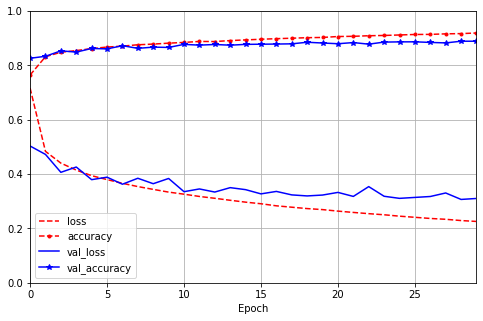

In [16]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3289 - accuracy: 0.8846


[0.3288842439651489, 0.8845999836921692]

In [20]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 82ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [21]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
print(y_pred)
print(np.array(class_names)[y_pred])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


In [22]:
y_new = y_test[:3]
print(y_new)

[9 2 1]


In [25]:
# Exporting SavedModels
from pathlib import Path

model_name = "my_mnist_model"
model_version = "0001"
model_path = Path(model_name) / model_version
model.save(model_path, save_format="tf")

In [26]:
loaded = tf.saved_model.load(model_path)
print(list(loaded.signatures.keys()))  # ["serving_default"]

['serving_default']


In [27]:
infer = loaded.signatures["serving_default"]
print(infer.structured_outputs)

{'dense_2': TensorSpec(shape=(None, 10), dtype=tf.float32, name='dense_2')}


In [28]:
!saved_model_cli show --dir my_mnist_model/0001

The given SavedModel contains the following tag-sets:
'serve'


In [30]:
!saved_model_cli show --dir my_mnist_model/0001 --tag_set serve

The given SavedModel MetaGraphDef contains SignatureDefs with the following keys:
SignatureDef key: "__saved_model_init_op"
SignatureDef key: "serving_default"


In [32]:
! saved_model_cli show --dir my_mnist_model/0001 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['flatten_input'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 28, 28)
      name: serving_default_flatten_input:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_2'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 10)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


In [34]:
# Install and start TF Serving 
url = "https://storage.googleapis.com/tensorflow-serving-apt"
src = "stable tensorflow-model-server tensorflow-model-server-universal"
!echo 'deb {url} {src}' > /etc/apt/sources.list.d/tensorflow-serving.list
!curl '{url}/tensorflow-serving.release.pub.gpg' | apt-key add -
!apt update -q && apt-get install -y tensorflow-model-server
%pip install -q -U tensorflow-serving-api

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  43925      0 --:--:-- --:--:-- --:--:-- 43279
OK
Get:1 https://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,026 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 https://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server-universal amd64 Packages [349 B]
Hit

In [38]:
os.environ["MODEL_DIR"] = str(model_path.parent.absolute())

In [39]:
%%bash --bg
tensorflow_model_server \
     --port=8500 \
     --rest_api_port=8501 \
     --model_name=my_mnist_model \
     --model_base_path="${MODEL_DIR}" >my_server.log 2>&1